In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import tensorflow as tf
from dataclasses import dataclass
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta
from helpers import helpers_functions
import joblib

In [2]:
df = pd.read_csv("datasets/tsla_data.csv")
df.head(10)

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2024-08-15,205.02,215.88,204.82,214.14,214.14,89337569,89337569,9.12,4.450000,209.9650,"August 15, 24",0.044500
1,2024-08-14,207.39,208.44,198.75,201.38,201.38,70250014,70250014,-6.01,-2.900000,203.9900,"August 14, 24",-0.029000
2,2024-08-13,198.47,208.49,197.06,207.83,207.83,76247387,76247387,9.36,4.720000,202.9625,"August 13, 24",0.047200
3,2024-08-12,199.02,199.26,194.67,197.49,197.49,64044903,64044903,-1.53,-0.768770,197.6100,"August 12, 24",-0.007688
4,2024-08-09,197.05,200.88,195.11,200.00,200.00,58648274,58648274,2.95,1.500000,198.2600,"August 09, 24",0.015000
5,2024-08-08,195.70,200.70,192.04,198.84,198.84,65033874,65033874,3.14,1.600000,196.8200,"August 08, 24",0.016000
6,2024-08-07,200.77,203.49,191.48,191.76,191.76,71159778,71159778,-9.01,-4.490000,196.8750,"August 07, 24",-0.044900
7,2024-08-06,200.75,202.90,192.67,200.64,200.64,73783942,73783942,-0.11,-0.054795,199.2400,"August 06, 24",-0.000548
8,2024-08-05,185.22,203.88,182.00,198.88,198.88,100308836,100308836,13.66,7.380000,192.4950,"August 05, 24",0.073800
9,2024-08-02,214.88,216.13,205.78,207.67,207.67,82880120,82880120,-7.21,-3.360000,211.1150,"August 02, 24",-0.033600


In [3]:
df.sort_values("date", inplace=True)
df.head(10)

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
1256,2019-08-19,14.95,15.19,14.78,15.12,15.12,79644000,79644000,0.17,1.14000,15.03,"August 19, 19",0.011400
1255,2019-08-20,15.17,15.27,14.97,15.06,15.06,61878000,61878000,-0.11,-0.72512,15.10,"August 20, 19",-0.007251
1254,2019-08-21,14.80,14.88,14.51,14.72,14.72,116914500,116914500,-0.08,-0.54054,14.70,"August 21, 19",-0.005405
1253,2019-08-22,14.85,15.03,14.55,14.81,14.81,98385000,98385000,-0.04,-0.26936,14.79,"August 22, 19",-0.002694
1252,2019-08-23,14.66,14.74,14.07,14.09,14.09,128079000,128079000,-0.57,-3.89000,14.30,"August 23, 19",-0.038900
1251,2019-08-26,14.24,14.33,14.10,14.33,14.33,75778500,75778500,0.09,0.63202,14.26,"August 26, 19",0.006320
1250,2019-08-27,14.38,14.59,14.14,14.27,14.27,81243000,81243000,-0.11,-0.76495,14.33,"August 27, 19",-0.007650
1249,2019-08-28,14.25,14.48,14.15,14.37,14.37,48382500,48382500,0.12,0.84211,14.34,"August 28, 19",0.008421
1248,2019-08-29,14.60,14.89,14.53,14.78,14.78,77692500,77692500,0.18,1.23000,14.74,"August 29, 19",0.012300
1247,2019-08-30,15.28,15.50,14.95,15.04,15.04,139809000,139809000,-0.24,-1.57000,15.16,"August 30, 19",-0.015700


In [4]:
df = df[["close","date"]]
df.head(10)

,close,date
1256,15.12,2019-08-19
1255,15.06,2019-08-20
1254,14.72,2019-08-21
1253,14.81,2019-08-22
1252,14.09,2019-08-23
1251,14.33,2019-08-26
1250,14.27,2019-08-27
1249,14.37,2019-08-28
1248,14.78,2019-08-29
1247,15.04,2019-08-30


In [5]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [6]:
@dataclass
class G:
    TIME = np.array(df["date"])
    SERIES = np.array(df["close"])
    SPLIT_TIME = 1000
    WINDOW_SIZE = 6
    BATCH_SIZE = 16
    SHUFFLE_BUFFER_SIZE = 250


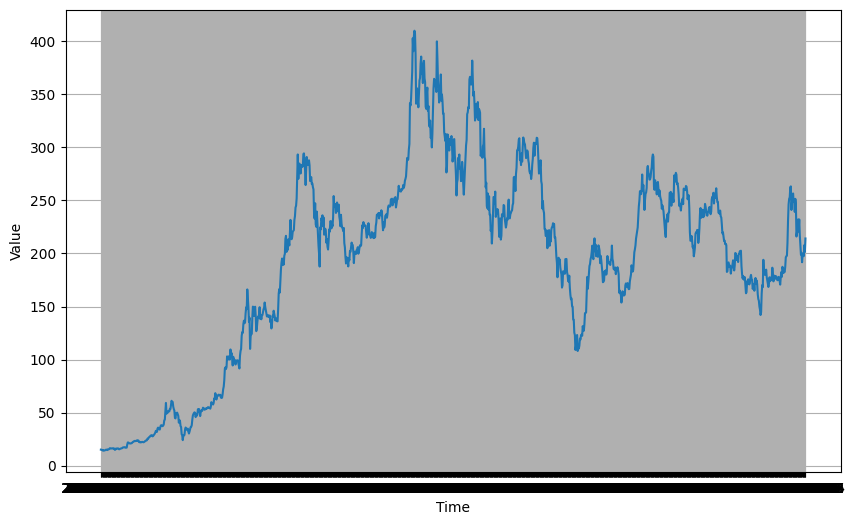

In [7]:
plt.figure(figsize=(10, 6))
plot_series(G.TIME, G.SERIES)
plt.show()

In [8]:
def train_val_split(time, series, time_step=G.SPLIT_TIME):
    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid


time_train, series_train, time_valid, series_valid = train_val_split(G.TIME, G.SERIES)

In [9]:
def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds

train_set = windowed_dataset(series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

In [10]:
def create_uncompiled_model():

    model = tf.keras.models.Sequential(
        [tf.keras.layers.LSTM(64, activation="relu", input_shape=[None,1]),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1)]
    )

    return model

In [11]:
uncompiled_model = create_uncompiled_model()

for X, y in train_set.take(1):

    print(f"Testing model prediction with input of shape {X.shape}...")
    y_pred = uncompiled_model.predict(X)

y_pred_shape = y_pred.squeeze().shape

assert y_pred_shape == y.shape, (f"Squuezed predicted y shape = {y_pred_shape}"
                                 f"whereas actual y shape = {y.shape}.")

print("Your current architecture is compatible with the windowed dataset!")

c:\Users\MEHMET\Desktop\stock_forecast\stenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Testing model prediction with input of shape (16, 6)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Your current architecture is compatible with the windowed dataset!


In [12]:
class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = tf.keras.backend.get_value(self.model.optimizer.learning_rate)

In [13]:
def adjust_learning_rate(dataset):
    model = create_uncompiled_model()

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

    lr_logger = LearningRateLogger()

    optimizer = tf.keras.optimizers.SGD(momentum=0.9)

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])
    
    history = model.fit(dataset, epochs=100, callbacks=[lr_schedule, lr_logger])

    return history

In [14]:
lr_history = adjust_learning_rate(train_set)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 53.9979 - mae: 54.4933 - learning_rate: 1.0000e-04 - lr: 1.0000e-04
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.7806 - mae: 13.2485 - learning_rate: 1.1220e-04 - lr: 1.1220e-04
Epoch 3/100
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.1786 - mae: 8.6786

C:\Users\MEHMET\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8042 - mae: 9.2835 - learning_rate: 1.2589e-04 - lr: 1.2589e-04
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3577 - mae: 9.8205 - learning_rate: 1.4125e-04 - lr: 1.4125e-04
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.1242 - mae: 18.6112 - learning_rate: 1.5849e-04 - lr: 1.5849e-04
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.4142 - mae: 15.8925 - learning_rate: 1.7783e-04 - lr: 1.7783e-04
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.4818 - mae: 14.9564 - learning_rate: 1.9953e-04 - lr: 1.9953e-04
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.6221 - mae: 13.1069 - learning_rate: 2.2387e-04 - lr: 2.2387e-04
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.4708 - mae: 19.9624 - learning_rate: 2.5119e-04 - lr: 2.5119e-04
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.7861 - mae: 15.2749 - learning_rate: 2.8184e-04 - lr: 2.8184e-04

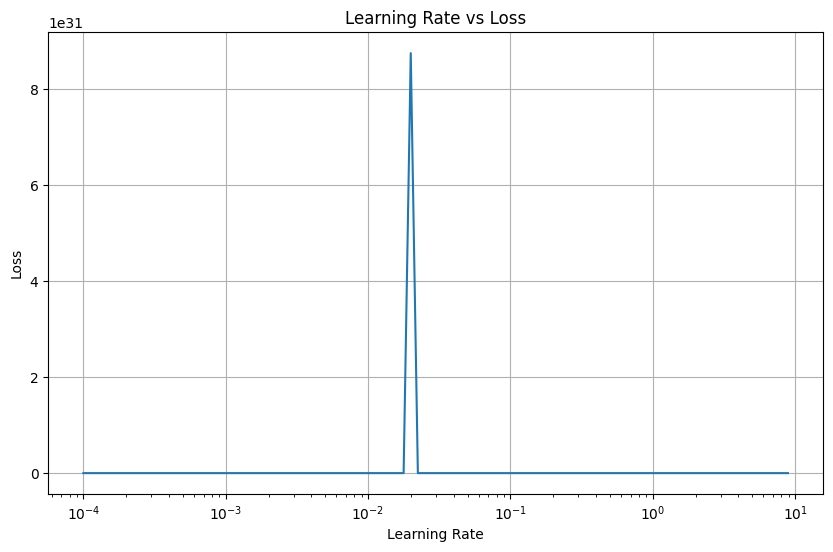

In [15]:
plt.figure(figsize=(10, 6))
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.grid(True)
plt.show()

In [16]:
def create_model():

    model = create_uncompiled_model()

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.00012589),
                  metrics=["mean_absolute_error"])
    
    return model

In [17]:
model = create_model()


history = model.fit(train_set, epochs=50)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 158.3313 - mean_absolute_error: 158.8313
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 137.4639 - mean_absolute_error: 137.9639
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 104.5774 - mean_absolute_error: 105.0774
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.9993 - mean_absolute_error: 12.4925
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3291 - mean_absolute_error: 6.7998
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4436 - mean_absolute_error: 5.9048
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7224 - mean_absolute_error: 5.1843
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3716 - mean_absolute_error: 4.8257
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4984 - mean_absolute_error: 4.9422
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4717 - mean_absolute_error: 4.9199
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━

In [18]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


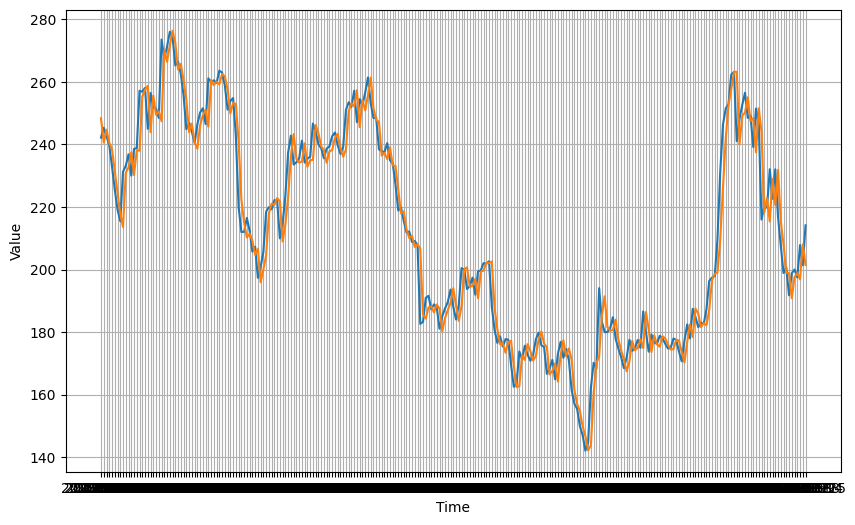

In [19]:
# Compute the forecast for all the series
lstm_forecast = model_forecast(model, G.SERIES, G.WINDOW_SIZE).squeeze()

# Slice the forecast to get only the predictions for the validation set
lstm_forecast = lstm_forecast[G.SPLIT_TIME - G.WINDOW_SIZE:-1]

# Plot the forecast
plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, lstm_forecast)

In [20]:
print(mean_absolute_error(series_valid, lstm_forecast))

5.322105123913242


In [21]:
df_series_valid = pd.DataFrame(series_valid)

In [22]:
df_series_valid.to_csv("datasets/lstm_val_series.csv")

In [23]:
X_last = series_valid[-G.WINDOW_SIZE:]

In [24]:
X_last = X_last.reshape((1, G.WINDOW_SIZE))

In [25]:
X_last = X_last.reshape((1, G.WINDOW_SIZE, 1))

In [26]:
X_last.shape

(1, 6, 1)

In [27]:
start_date = G.TIME[-1:]

In [28]:
start_date

array(['2024-08-15'], dtype=object)

In [29]:
future_dates, predictions = helpers_functions.predict_future_lstm(model, X_last, start_date )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

In [30]:
future_dates

[DatetimeIndex(['2024-08-16'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-17'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-18'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-19'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-20'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-21'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-22'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-23'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-24'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-25'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-26'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-27'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-28'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-29'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-08-30'], dtype='datetime64[ns]', freq=No

In [31]:
predictions

[213.63217,
 214.38821,
 214.69608,
 215.03835,
 214.67714,
 214.06755,
 213.38881,
 212.63673,
 211.81227,
 210.9453,
 210.06071,
 209.16615,
 208.26585,
 207.36505,
 206.46788,
 205.57678,
 204.69318,
 203.81836,
 202.95322,
 202.09837,
 201.25432,
 200.42139,
 199.59982,
 198.78983,
 197.99152,
 197.20496,
 196.43022,
 195.66734,
 194.91635,
 194.17722]

In [32]:
joblib.dump(model, "lstm_model.pkl")

['lstm_model.pkl']